In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thermoextrap.ig import IGmodel
from thermoextrap.xtrapy.core import InterpModel
from thermoextrap.xtrapy import xpan_beta
from thermoextrap.xtrapy import recursive_interp

In [2]:
betavals = np.arange(0.1, 10.0, 0.5)
mIG = IGmodel(nParticles=1000)

In [3]:
from importlib import reload
# reload(recursive_interp)


Interpolating from points 0.100000 and 9.600000
Recursion depth on this branch: 0
Maximum bootstrapped error within interval: 0.006693
Selected new extrapolation point: 4.753061


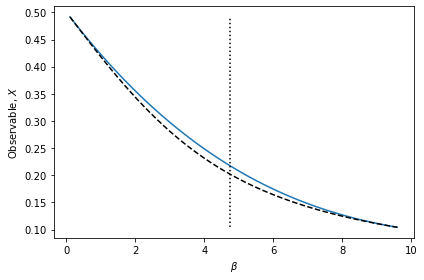


Interpolating from points 0.100000 and 4.753061
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002329
No additional extrapolation points necessary on this interval.


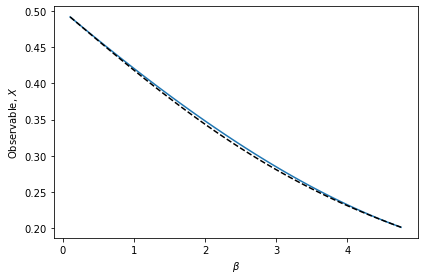


Interpolating from points 4.753061 and 9.600000
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002455
No additional extrapolation points necessary on this interval.


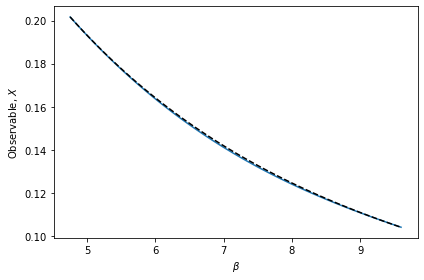

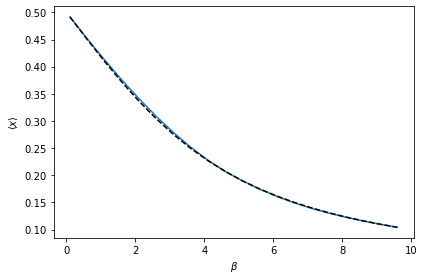

In [328]:
plt.ioff()

#Generate coefficients
coefs = xpan_beta.factory_coefs()

#Create the recursive model
intPpiecewise = recursive_interp.RecursiveInterp(InterpModel, coefs,
                                                 [betavals[0], betavals[-1]],
                                                 maxOrder=1, errTol=0.003)

#Train it recursively until error tolerance reached
#Turn off verbose or doPlot if don't want to see progress of algorithm
#plotCompareFunc provides the true values to compare to in the figure
np.random.seed(42)
intPpiecewise.recursiveTrain(betavals[0], betavals[-1], verbose=True, doPlot=True, plotCompareFunc=mIG.avgX)

#Obtain predictions from our model, which will be based on piecewise interpolating polynomials
intPpredict = intPpiecewise.predict(betavals)

#Plot to compare against true average versus beta for ideal gas model
plt.ion()
interpFig, interpAx = plt.subplots()

interpAx.plot(betavals, intPpredict)
interpAx.plot(betavals, mIG.avgX(betavals), 'k--', zorder=3)

interpAx.set_ylabel(r'$\langle x \rangle$')
interpAx.set_xlabel(r'$\beta$')

interpFig.tight_layout()

plt.show()

In [334]:
intPpiecewise.sequentialTrain([2.5, 7.5], verbose=True)


Interpolating from points 0.100000 and 2.500000
Maximum bootstrapped error within interval: 0.001045
At point: 1.520408

Interpolating from points 2.500000 and 4.753061
Maximum bootstrapped error within interval: 0.001166
At point: 3.465598

Interpolating from points 4.753061 and 7.500000
Maximum bootstrapped error within interval: 0.001244
At point: 5.818201

Interpolating from points 7.500000 and 9.600000
Maximum bootstrapped error within interval: 0.000765
At point: 8.314286


Interval with edges [0.1        2.5        4.75306122] (indices [0 1 2]):
	P-values between regions:
[0.98461679 0.99923985 0.99999214 0.99999424]
	P-values for full and 1 :
[0.08773549 0.20590073 0.96236813 0.98934272]
	P-values for full and 2 :
[0.98451028 0.99906586 0.99979598 0.99988576]
Interval with edges [2.5        4.75306122 7.5       ] (indices [1 2 3]):
	P-values between regions:
[0.34275781 0.39736887 0.41570326 0.40319922]
	P-values for full and 1 :
[0.19507257 0.23341118 0.27487307 0.29829498]
	P-values for full and 2 :
[0.26937647 0.3088257  0.32930399 0.33866919]
Interval with edges [4.75306122 7.5        9.6       ] (indices [2 3 4]):
	P-values between regions:
[0.9372757  0.95191404 0.95807262 0.95629616]
	P-values for full and 1 :
[0.52086823 0.57997695 0.63626521 0.67496429]
	P-values for full and 2 :
[0.89800626 0.91201092 0.91995436 0.92408978]


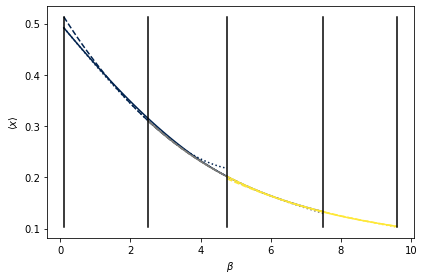

In [517]:
consist = intPpiecewise.checkPolynomialConsistency(doPlot=True)

# new interp

In [526]:
from thermoextrap.ig import IGmodel
import thermoextrap.xtrapy.xpan_beta as xpan_beta
import thermoextrap.xtrapy.core as core

In [701]:
int(np.random.rand() * 1000)

621

In [702]:
def factory_state(beta, order, nrep=100, rep_dim='rep'):
    np.random.seed(int(beta * 1000))
    datModel = IGmodel(nParticles=1000)
    xdata, udata = datModel.genData(beta, nConfigs=10000)
    
    data = xpan_beta.DataCentralMomentsVals.from_vals(xv=xdata, uv=udata, order=order)
    
    # use indices for reproducability
    nrec = len(xdata)
    indices = np.random.choice(nrec, (nrep, nrec))
    
    return xpan_beta.factory_extrapmodel(beta=beta, data=data).resample(indices=indices, rep_dim=rep_dim)        

In [722]:
import thermoextrap.xtrapy.adaptive_interp as adaptive_interp
reload(adaptive_interp)

<module 'thermoextrap.xtrapy.adaptive_interp' from '/Users/wpk/Documents/python/projects/thermodynamic-extrapolation/thermoextrap/xtrapy/adaptive_interp.py'>

In [723]:
alphas = np.arange(betavals[0], betavals[-1] + 0.05, 0.1)

np.random.seed(20)
model_iter, info_iter = adaptive_interp.train_iterative(
    alphas=alphas, 
    factory_state=factory_state, 
    # Note: for things to be similar between this and
    # recursive, must use peicewise
    factory_statecollection=core.InterpModelPiecewise, 
    state_kws={'order': 1, 'nrep': 100, 'rep_dim': 'rep'},
    predict_kws={'order': 1},
    reduce_dim='rep',
    alpha_tol=0.1, tol=0.002,
)
    


In [ ]:
alphas = np.arange(betavals[0], betavals[-1] + 0.05, 0.1)
np.random.seed(20)

states = None
info = []
for i in range(10):
    model_iter, info_iter = adaptive_interp.train_iterative(
        alphas=alphas, 
        factory_state=factory_state, 
        # Note: for things to be similar between this and
        # recursive, must use peicewise
        factory_statecollection=core.InterpModelPiecewise, 
        states=None,
        state_kws={'order': 1, 'nrep': 100, 'rep_dim': 'rep'},
        predict_kws={'order': 1},
        reduce_dim='rep',
        alpha_tol=0.1, tol=0.002,
    )
    
    if 'alpha_new' not in info_iter[0]
    
    

In [716]:
np.random.seed(20)
states_recurse, info_recurse = adaptive_interp.train_recursive(
    alphas=alphas,
    factory_state=factory_state,
    factory_statecollection=core.InterpModel,
    state_kws={'order': 1, 'nrep': 100, 'rep_dim': 'rep'},
    predict_kws={'order': 1},
    reduce_dim='rep',
    alpha_tol = 0.1, tol=0.002
)

In [717]:
for a, b in zip(model_iter, states_recurse):
    xr.testing.assert_allclose(a.data.dxdu, b.data.dxdu)

In [720]:
list(map(lambda x: x.alpha0, states_recurse))

[0.1, 2.2, 4.6, 6.6, 9.6]

In [323]:
modelb = core.InterpModel([model.states[0], model.states[-1]])

In [279]:
import cmomy

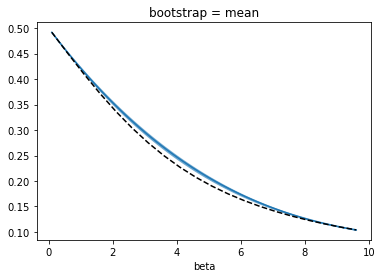

In [326]:
boot = modelb.predict(alphas).pipe(cmomy.xbootstrap_confidence_interval, dim='rep')
l, = boot.sel(bootstrap='mean').plot()
plt.fill_between(boot.beta, boot.sel(bootstrap='low'), boot.sel(bootstrap='high'), color=l.get_color(), alpha=0.5)

plt.plot(betavals, mIG.avgX(betavals), 'k--', zorder=3)


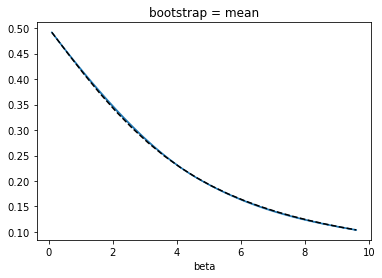

In [327]:
boot = model.predict(alphas).pipe(cmomy.xbootstrap_confidence_interval, dim='rep')
l, = boot.sel(bootstrap='mean').plot()
plt.fill_between(boot.beta, boot.sel(bootstrap='low'), boot.sel(bootstrap='high'), color=l.get_color(), alpha=0.5)

plt.plot(betavals, mIG.avgX(betavals), 'k--', zorder=3)


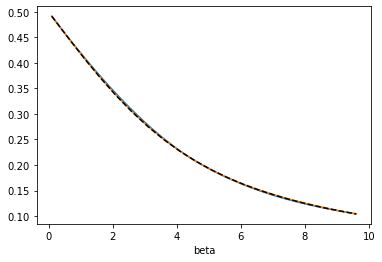

In [277]:
model.predict(alphas).mean('rep').plot()
modelb.predict(alphas).mean('rep').plot()
plt.plot(betavals, mIG.avgX(betavals), 'k--', zorder=3)


In [185]:
out = core.InterpModelPiecewise([states[0], states[-1]])

In [188]:
(
    out.predict(alphas)
    .pipe(lambda x: x.std('rep') / np.abs(x.mean('rep')))
    
)

<xarray.DataArray (beta: 96)>
array([0.00018134, 0.00028997, 0.000478  , 0.00068072, 0.00088653,
       0.00109231, 0.00129686, 0.00149959, 0.00170015, 0.00189827,
       0.00209377, 0.00228646, 0.00247621, 0.00266285, 0.00284625,
       0.00302627, 0.00320277, 0.00337561, 0.00354466, 0.00370978,
       0.00387083, 0.00402766, 0.00418014, 0.00432812, 0.00447147,
       0.00461002, 0.00474365, 0.0048722 , 0.00499553, 0.00511349,
       0.00522594, 0.00533272, 0.0054337 , 0.00552874, 0.00561768,
       0.0057004 , 0.00577674, 0.00584659, 0.0059098 , 0.00596625,
       0.00601581, 0.00605838, 0.00609383, 0.00612206, 0.00614298,
       0.00615649, 0.00616251, 0.00616097, 0.00615181, 0.00613498,
       0.00611045, 0.00607818, 0.00603818, 0.00599044, 0.00593499,
       0.00587187, 0.00580115, 0.00572289, 0.0056372 , 0.00554421,
       0.00544406, 0.00533691, 0.00522296, 0.00510245, 0.0049756 ,
       0.0048427 , 0.00470406, 0.00456001, 0.0044109 , 0.00425714,
       0.00409914, 0.00393735, 0.00377225, 0.00360433, 0.00343413,
       0.00326219, 0.00308907, 0.00291534, 0.00274159, 0.00256839,
       0.00239631, 0.00222589, 0.00205765, 0.00189204, 0.00172946,
       0.00157023, 0.00141456, 0.00126257, 0.00111427, 0.00096958,
       0.0008285 , 0.00069125, 0.00055901, 0.00043565, 0.00033283,
       0.00028047])
Coordinates:
  * beta     (beta) float64 0.1 0.2 0.3 0.4 0.5 0.6 ... 9.1 9.2 9.3 9.4 9.5 9.6

In [54]:
np.random.seed(42)
s0 = factory_state(0.1)
s1 = factory_state(9.6)

In [61]:
model = core.InterpModelPiecewise([s0, s1]).resample(nrep=100)

In [65]:
rel_err = (
    model
    .predict(betavals)
    .pipe(lambda x: x.std('rep') / np.abs(x.mean('rep')))
    .pipe(lambda x: x.where(~np.isinf(x)).fillna(0.0))
)

In [109]:
max_dims = set(rel_err.dims) - {model.alpha_name}
if len(max_dims) > 0:
    rel_err = rel_err.max(max_dims)

In [144]:
rel_err.idxmax('beta')

<xarray.DataArray 'beta' ()>
array(4.6)

In [127]:
rel_err.where(rel_err > 0.003, drop=True)

<xarray.DataArray (beta: 13)>
array([0.00350339, 0.00447982, 0.00532955, 0.00603111, 0.00656273,
       0.0069034 , 0.00703454, 0.00694231, 0.00662066, 0.00607508,
       0.0053269 , 0.00441769, 0.00341267])
Coordinates:
  * beta     (beta) float64 1.6 2.1 2.6 3.1 3.6 4.1 4.6 5.1 5.6 6.1 6.6 7.1 7.6

In [129]:
alpha_states = xr.DataArray(model.alpha0, dims='alpha_state')

In [131]:
alpha_states

<xarray.DataArray (alpha_state: 2)>
array([0.1, 9.6])
Dimensions without coordinates: alpha_state

In [138]:
np.abs(rel_err.beta - alpha_states).min('alpha_state') > 0.01

<xarray.DataArray (beta: 20)>
array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])
Coordinates:
  * beta     (beta) float64 0.1 0.6 1.1 1.6 2.1 2.6 ... 7.1 7.6 8.1 8.6 9.1 9.6

In [120]:
for x in rel_err.sortby(rel_err, ascending=False):
    pass

In [122]:
x.values

array(0.00017183)

In [105]:
len({*rel_err.dims} - {'beta'})

0

In [98]:
set(rel_err.dims) - set('beta')

{'beta'}

In [ ]:
max_dims = set(rel_err.dims)

In [95]:
rel_err

<xarray.DataArray (beta: 20)>
array([0.00017183, 0.00125385, 0.00242093, 0.00350339, 0.00447982,
       0.00532955, 0.00603111, 0.00656273, 0.0069034 , 0.00703454,
       0.00694231, 0.00662066, 0.00607508, 0.0053269 , 0.00441769,
       0.00341267, 0.00240084, 0.0014851 , 0.0007474 , 0.00033371])
Coordinates:
  * beta     (beta) float64 0.1 0.6 1.1 1.6 2.1 2.6 ... 7.1 7.6 8.1 8.6 9.1 9.6

In [82]:
import xarray as xr

In [86]:
xx = xr.DataArray(np.random.rand(2,3,4))

In [ ]:
# take min over all dims less

In [94]:
xx.min([])

<xarray.DataArray (dim_0: 2, dim_1: 3, dim_2: 4)>
array([[[0.58717694, 0.2442841 , 0.96424441, 0.16410174],
        [0.92506971, 0.66098679, 0.21831529, 0.66683983],
        [0.20509259, 0.45751512, 0.60506466, 0.63477169]],

       [[0.44668778, 0.98120189, 0.74120728, 0.91008721],
        [0.41174969, 0.11649404, 0.23254825, 0.4270797 ],
        [0.68790848, 0.99022315, 0.53210703, 0.29157029]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

In [91]:
abs(-1.0)

1.0

In [90]:
xx.argmax(xx.dims)

{'dim_0': <xarray.DataArray ()>
 array(1),
 'dim_1': <xarray.DataArray ()>
 array(2),
 'dim_2': <xarray.DataArray ()>
 array(1)}

In [81]:
rel_err.idxmax()

<xarray.DataArray 'beta' ()>
array(4.6)

In [80]:
rel_err.max(['beta'])

<xarray.DataArray ()>
array(0.00703454)

In [69]:
check_idx = rel_err.argmax(rel_err.dims)
check_val = rel_err.isel(**check_idx)


In [72]:
check_val

<xarray.DataArray ()>
array(0.00703454)
Coordinates:
    beta     float64 4.6

In [63]:
pred = model.predict(betavals)
pred_ave = pred.mean('rep')
pred_std = pred.std('rep')


In [64]:
pred_std

<xarray.DataArray (beta: 20)>
array([8.44832412e-05, 5.66933215e-04, 1.00536978e-03, 1.33462707e-03,
       1.56381378e-03, 1.70316463e-03, 1.76310317e-03, 1.75410660e-03,
       1.68667144e-03, 1.57130148e-03, 1.41850149e-03, 1.23877174e-03,
       1.04259949e-03, 8.40441015e-04, 6.42678050e-04, 4.59499285e-04,
       3.00544365e-04, 1.73758819e-04, 8.22218450e-05, 3.47452062e-05])
Coordinates:
  * beta     (beta) float64 0.1 0.6 1.1 1.6 2.1 2.6 ... 7.1 7.6 8.1 8.6 9.1 9.6

In [60]:
model.resample(nrep=100, rep_dim='rep')

In [39]:
interp_model = recursive.RecursiveInterp(factory_state, core.InterpModel, [betavals[0], betavals[-1]], tol=0.003)

In [ ]:
interp_model.train_recursive()

In [40]:
intPpiecewise.edgeB

array([0.1       , 2.5       , 4.75306122, 7.5       , 9.6       ])

In [37]:
factory_statecollection = core.InterpModel

In [38]:
np.random.seed(42)

In [ ]:
int

In [28]:
s.xcoefs()

<xarray.DataArray 'x' (order: 2)>
array([ 0.4916605 , -0.08183438])
Dimensions without coordinates: order

# original recursive interp

In [7]:
from thermoextrap import interp
import thermoextrap.recursive_interp as orig_recursive_interp


Interpolating from points 0.100000 and 9.600000
Recursion depth on this branch: 0
Maximum bootstrapped error within interval: 0.006629
Selected new extrapolation point: 4.559184


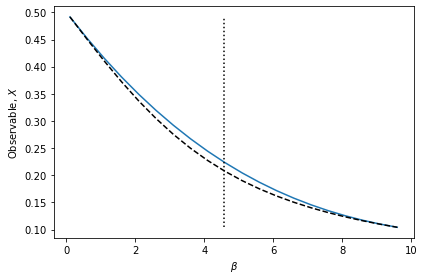


Interpolating from points 0.100000 and 4.559184
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002181
No additional extrapolation points necessary on this interval.


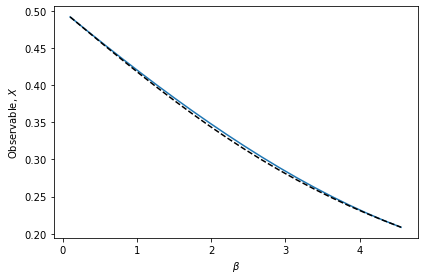


Interpolating from points 4.559184 and 9.600000
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002513
No additional extrapolation points necessary on this interval.


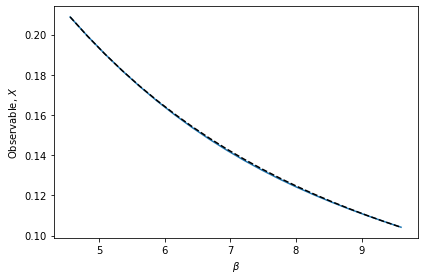

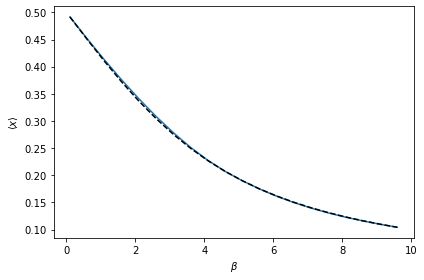

In [8]:
plt.ioff()

#Now want to look at recursive interpolation procedure
#Will only use polynomial interpolation model here
iModelPoly = interp.InterpModel(maxOrder=1)

#Create the recursive model
orig_intPpiecewise = orig_recursive_interp.RecursiveInterp(iModelPoly,
                                                           [betavals[0], betavals[-1]],
                                                           maxOrder=1, errTol=0.003)

#Train it recursively until error tolerance reached
#Turn off verbose or doPlot if don't want to see progress of algorithm
#plotCompareFunc provides the true values to compare to in the figure
np.random.seed(42)
orig_intPpiecewise.recursiveTrain(betavals[0], betavals[-1], verbose=True, doPlot=True, plotCompareFunc=mIG.avgX)

#Obtain predictions from our model, which will be based on piecewise interpolating polynomials
orig_intPpredict = orig_intPpiecewise.predict(betavals)[:,0]

#Plot to compare against true average versus beta for ideal gas model
plt.ion()
interpFig, interpAx = plt.subplots()

interpAx.plot(betavals, orig_intPpredict)
interpAx.plot(betavals, mIG.avgX(betavals), 'k--', zorder=3)

interpAx.set_ylabel(r'$\langle x \rangle$')
interpAx.set_xlabel(r'$\beta$')

interpFig.tight_layout()

plt.show()

In [9]:
orig_intPpiecewise.sequentialTrain([2.5, 7.5], verbose=True)


Interpolating from points 0.100000 and 2.500000
Maximum bootstrapped error within interval: 0.001132
At point: 1.373469

Interpolating from points 2.500000 and 4.559184
Maximum bootstrapped error within interval: 0.001130
At point: 3.466556

Interpolating from points 4.559184 and 7.500000
Maximum bootstrapped error within interval: 0.001439
At point: 5.759517

Interpolating from points 7.500000 and 9.600000
Maximum bootstrapped error within interval: 0.000684
At point: 8.314286


Interval with edges [0.1        2.5        4.55918367] (indices [0 1 2]):
	P-values between regions:
[[0.15701247]
 [0.46345775]
 [0.95736662]
 [0.99973502]]
	P-values for full and 1 :
[[0.11213806]
 [0.25693442]
 [0.99206828]
 [0.99986639]]
	P-values for full and 2 :
[[0.15911696]
 [0.4220807 ]
 [0.6738589 ]
 [0.77618343]]
Interval with edges [2.5        4.55918367 7.5       ] (indices [1 2 3]):
	P-values between regions:
[[0.1452714 ]
 [0.56119886]
 [0.78710997]
 [0.87253836]]
	P-values for full and 1 :
[[0.70077163]
 [0.78441817]
 [0.85440188]
 [0.89162384]]
	P-values for full and 2 :
[[0.42331733]
 [0.28580983]
 [0.18993119]
 [0.12195764]]
Interval with edges [4.55918367 7.5        9.6       ] (indices [2 3 4]):
	P-values between regions:
[[0.93363809]
 [0.93788908]
 [0.93372544]
 [0.91720733]]
	P-values for full and 1 :
[[0.27050509]
 [0.30592786]
 [0.33992605]
 [0.35700128]]
	P-values for full and 2 :
[[0.9231768 ]
 [0.92937988]
 [0.93207647]
 [0.9324086 ]]


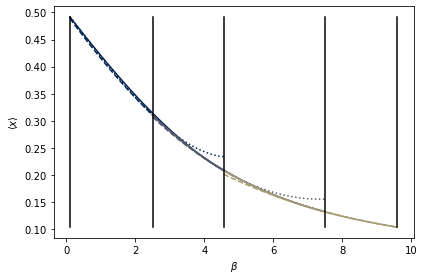

In [10]:
checkPvals = orig_intPpiecewise.checkPolynomialConsistency(doPlot=True)